# Sort model matches

## Imports

In [1]:
import sys
import os
import pprint
import parse
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
gleam_root = "/home/phdenzel/gleam"
sys.path.append(gleam_root)
from gleam.utils.makedir import mkdir_p
from gleam.utils.encode import an_sort
from mcmc_eval import read_mcmctxt
from match_eval import read_matchlog

In [2]:
# Parameter settings
ids = ['SDSSJ0029-0055', 'SDSSJ0737+3216', 'SDSSJ0753+3416', 'SDSSJ0956+5100',
       'SDSSJ1051+4439', 'SDSSJ1430+6104', 'SDSSJ1627-0053']
df = {}
chi2_mcmc = {}
chi2_match = {}

for lens in ids:
    mfile = 'models/matches/{}_matching.csv'.format(lens)
    df[lens] = pd.read_csv(mfile, index_col=0)

idx = 0
lens = ids[idx]

# df[lens].index.astype(float)

In [3]:
print("Paper values")
pvals = [2.6782, 3.4704, 2.7768, 3.4979, 2.6880, 2.4904, 2.3681]
for i in range(7):
    print "Chi2: ", pvals[i]

Paper values
Chi2:  2.6782
Chi2:  3.4704
Chi2:  2.7768
Chi2:  3.4979
Chi2:  2.688
Chi2:  2.4904
Chi2:  2.3681


In [4]:
print("Match values")
for lens in ids:
    print "Entry: ", df[lens].chi2.min()  # chi2_match[lens].min()

Match values
Entry:  2.6782
Entry:  3.4704
Entry:  2.7752
Entry:  3.4979
Entry:  2.6869
Entry:  2.4904
Entry:  2.3681


In [5]:
# number of models
for lens in ids:
    n_models = df[lens].chi2.count()
    print("{}:\t {:4d} models".format(lens, n_models))

SDSSJ0029-0055:	  697 models
SDSSJ0737+3216:	  133 models
SDSSJ0753+3416:	  629 models
SDSSJ0956+5100:	   84 models
SDSSJ1051+4439:	  300 models
SDSSJ1430+6104:	  616 models
SDSSJ1627-0053:	  257 models


SDSSJ0029-0055 # models w/ chi2<5: 138
SDSSJ0737+3216 # models w/ chi2<5: 8
SDSSJ0753+3416 # models w/ chi2<5: 108
SDSSJ0956+5100 # models w/ chi2<5: 10
SDSSJ1051+4439 # models w/ chi2<5: 41
SDSSJ1430+6104 # models w/ chi2<5: 98
SDSSJ1627-0053 # models w/ chi2<5: 63


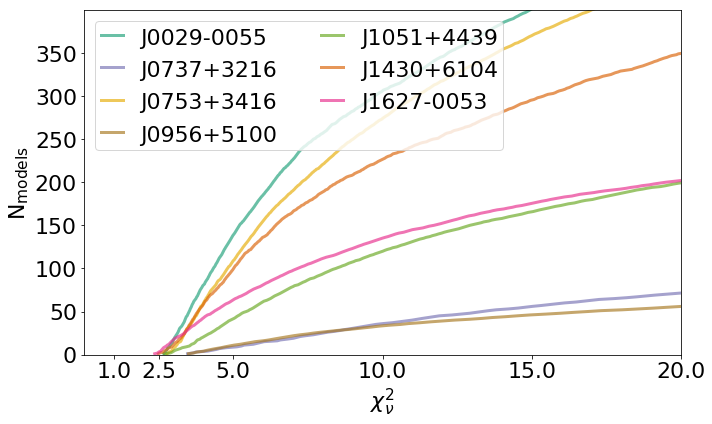

In [6]:
plt.figure(figsize=(10, 6))
color_ordering = [0, 2, 5, 6, 4, 1, 3]
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d']  # Dark2
# colors = ['#db5f57', '#dbd057', '#75db57', '#57dbaa', '#579bdb', '#8557db', '#db57c0']  # default
colors = [colors[i] for i in color_ordering]

for idx, lens in enumerate(ids):
    nmodels = df[lens].index.astype(float).to_numpy()+1

    thresh = (np.abs(df[lens].chi2 - 5)).idxmin()
    print lens, "# models w/ chi2<5:", thresh
    
    plt.plot(df[lens].chi2, nmodels, lw=3, color=colors[idx], alpha=0.65,
             label=lens.replace('SDSS', ''))
    plt.ylim(0, 400)

fntsz = 22
plt.xlim(0, 20)
plt.ylabel('N$_{\mathrm{models}}$', fontsize=fntsz)
plt.xlabel(r'$\chi^{2}_{\nu}$', fontsize=fntsz)

plt.yticks(range(0, 400, 50), fontsize=fntsz)
plt.xticks([1, 2.5, 5, 10, 15, 20], fontsize=fntsz)

plt.legend(handlelength=1, handleheight=1, borderpad=0.25, 
           fontsize=fntsz, fancybox=True, loc=2, ncol=2)
plt.tight_layout()
savename = 'chi2_distr_{}.pdf'.format('norm')
plt.savefig(savename, transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()

SDSSJ0029-0055 # models w/ chi2<5: 138
SDSSJ0737+3216 # models w/ chi2<5: 8
SDSSJ0753+3416 # models w/ chi2<5: 108
SDSSJ0956+5100 # models w/ chi2<5: 10
SDSSJ1051+4439 # models w/ chi2<5: 41
SDSSJ1430+6104 # models w/ chi2<5: 98
SDSSJ1627-0053 # models w/ chi2<5: 63


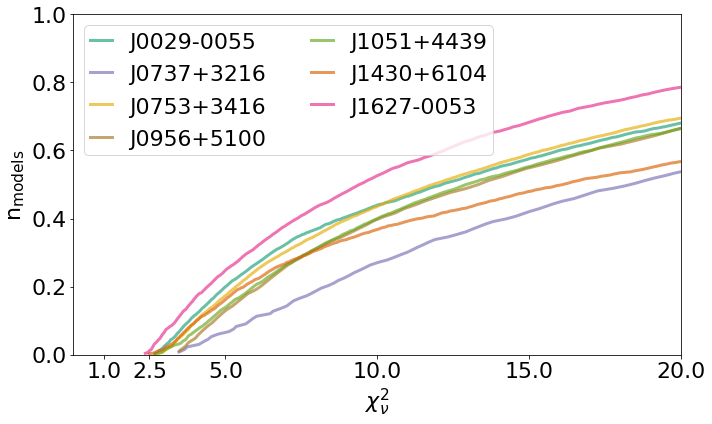

In [7]:
plt.figure(figsize=(10, 6))
color_ordering = [0, 2, 5, 6, 4, 1, 3]
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d']  # Dark2
# colors = ['#db5f57', '#dbd057', '#75db57', '#57dbaa', '#579bdb', '#8557db', '#db57c0']  # default
colors = [colors[i] for i in color_ordering]

for idx, lens in enumerate(ids):
    nmodels = df[lens].index.astype(float).to_numpy()+1
    nmodels /= df[lens].chi2.count()

    thresh = (np.abs(df[lens].chi2 - 5)).idxmin()
    print lens, "# models w/ chi2<5:", thresh
    
    plt.plot(df[lens].chi2, nmodels, lw=3, color=colors[idx], alpha=0.65,
             label=lens.replace('SDSS', ''))
    plt.ylim(0, 1)

fntsz = 22
plt.xlim(0, 20)
plt.ylabel('n$_{\mathrm{models}}$', fontsize=fntsz)
plt.xlabel(r'$\chi^{2}_{\nu}$', fontsize=fntsz)

plt.yticks(np.linspace(0, 1, 6), fontsize=fntsz)
plt.xticks([1, 2.5, 5, 10, 15, 20], fontsize=fntsz)

plt.legend(handlelength=1, handleheight=1, borderpad=0.25, 
           fontsize=fntsz, fancybox=True, loc=2, ncol=2)
plt.tight_layout()
savename = 'chi2_distr_{}.pdf'.format('norm')
plt.savefig(savename, transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()

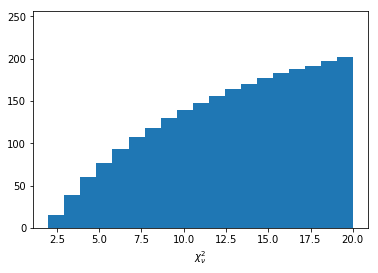

In [8]:
plt.hist(df[lens].chi2, bins=np.linspace(2, 20, 20), cumulative=True, color='tab:blue')
plt.ylim(0, df[lens].chi2.count())
plt.xlabel(r'$\chi^{2}_{\nu}$')
plt.show()

### Threshold in $\chi^{2}$

In [9]:
def pm_formatter(x, fmt='{:0.2f}'):
    xstr = fmt.format(x[0]) + '$^{+' 
    xstr += fmt.format(x[1]) + '}_{-' 
    xstr += fmt.format(x[2]) + '}$'
    return xstr

def pm_formatter(x, fmt='{:0.2f}'):
    xstr = fmt.format(x[0]) + '$^{+' 
    xstr += fmt.format(x[1]) + '}_{-' 
    xstr += fmt.format(x[2]) + '}$'
    return xstr

def mcmc_percentiles(data, exponent=0):
    q = np.percentile(data, [32, 50, 68])
    return [q[1]/10**exponent,
            (q[2]-q[1])/10**exponent,
            (q[1]-q[0])/10**exponent]


In [10]:
threshold = 5
df_thres = {}

phi_rel = [[1.0, 0.1, 1.7], [267.1, 3.7, 2.1],
           [358.7, 0.1, 2.2], [152.8, 2.9, 6.2],
           [225.1, 1.7, 3.9], [3.3, 1.0, 3.8], [359.3, 0.1, 1.5]]

# N_match_str = '$N_{\chi^{2}_{\nu} < '+'{}'.format(threshold)+'}$'
N_agn_str = '$N_{\\chi^{2}_{\\nu} < '+'{}'.format(threshold)+'}$'
N_fbc_str = '$N_{\\chi^{2}_{\\nu} < '+'{}'.format(threshold)+'}$'
# fbc_str = '$P(\hbox{FBconst}\,|\,D)$'
# agn_str = '$\\frac{P(\mathrm{AGNdT8}\,|\,D)}{P(\mathrm{FBconst}\,|\,D)}$'
# chi2_str = '$\chi^{2}_{\nu} < '+'{}'.format(threshold)+'$'
chi2_agn_str = '$\\chi^{2}_{\\nu}$'
chi2_fbc_str = '$\\chi^{2}_{\\nu}$'
rot_str = '$\Delta\phi_{\mathrm{rel}}$'
re_str = '$\\theta_{E}$'
mst_str = '$M_{\mathrm{stel}}$'
clmns = ['Lens', N_agn_str+'AGNT8', N_fbc_str+'FBconst', chi2_agn_str+'AGNT8', chi2_fbc_str+'FBconst', rot_str, re_str, mst_str]
clmn_1st = ['Lens', N_agn_str, N_fbc_str, chi2_agn_str, chi2_fbc_str, rot_str, re_str, mst_str]
clmn_2nd = u' & AGNdT8 & FBconst & AGNdT8 & FBconst & [\degree] & [\\arcsec] & [$10^{10}\,M_{\odot}$] \\\\ \\hline \\'
df_ltx = pd.DataFrame(columns=clmns)

for idx, lens in enumerate(ids):
    df_thres[lens] = df[lens][df[lens].chi2 < threshold]
    N_total = df[lens].chi2.count()
    N_thres = df_thres[lens].chi2.count()
    print "{:3d} / {:3d} below the chi2 threshold of {}".format(N_thres, N_total, threshold)

    row = [lens,
           df_thres[lens].AGNT8.sum(),
           df_thres[lens].FBconst.sum(),
           df_thres[lens][df_thres[lens].AGNT8 == 1].chi2.min(),
           df_thres[lens][df_thres[lens].FBconst == 1].chi2.min(),
           phi_rel[idx],  # mcmc_percentiles(df_thres[lens].rotation),
           [0, 0, 0],  # mcmc_percentiles(f_thres[lens].rE),
           mcmc_percentiles(df_thres[lens].M_stel, exponent=10)]
    print(row)
    df_ltx = df_ltx.append(dict(zip(clmns, row)), ignore_index=True)
    # print row
    
df_ltx


138 / 697 below the chi2 threshold of 5
['SDSSJ0029-0055', 52, 86, 2.7089620636319984, 2.6782, [1.0, 0.1, 1.7], [0, 0, 0], [2.271427144285, 0.3478488482998005, 0.38124877447939987]]
  8 / 133 below the chi2 threshold of 5
['SDSSJ0737+3216', 6, 2, 3.744747234838064, 3.4704, [267.1, 3.7, 2.1], [0, 0, 0], [8.64557735687, 3.5036972947260026, 1.9922355383619994]]
109 / 629 below the chi2 threshold of 5
['SDSSJ0753+3416', 61, 48, 2.7752, 2.8423178019242217, [358.7, 0.1, 2.2], [0, 0, 0], [1.94886995895, 0.2468697111868, 0.6144402491404]]
 10 /  84 below the chi2 threshold of 5
['SDSSJ0956+5100', 4, 6, 3.4979, 3.679266945585786, [152.8, 2.9, 6.2], [0, 0, 0], [10.7017067611, 2.1450213421399993, 0.3478112468332001]]
 41 / 300 below the chi2 threshold of 5
['SDSSJ1051+4439', 17, 24, 2.8997674869287526, 2.6869, [225.1, 1.7, 3.9], [0, 0, 0], [4.7703468379, 0.8923394744040009, 0.5449950769279999]]
 99 / 616 below the chi2 threshold of 5
['SDSSJ1430+6104', 41, 58, 2.4904, 2.6541790925339472, [3.3, 1.

,Lens,$N_{\chi^{2}_{\nu} < 5}$AGNT8,$N_{\chi^{2}_{\nu} < 5}$FBconst,$\chi^{2}_{\nu}$AGNT8,$\chi^{2}_{\nu}$FBconst,$\Delta\phi_{\mathrm{rel}}$,$\theta_{E}$,$M_{\mathrm{stel}}$
0,SDSSJ0029-0055,52,86,2.708962,2.678200,"[1.0, 0.1, 1.7]","[0, 0, 0]","[2.271427144285, 0.3478488482998005, 0.3812487..."
1,SDSSJ0737+3216,6,2,3.744747,3.470400,"[267.1, 3.7, 2.1]","[0, 0, 0]","[8.64557735687, 3.5036972947260026, 1.99223553..."
2,SDSSJ0753+3416,61,48,2.775200,2.842318,"[358.7, 0.1, 2.2]","[0, 0, 0]","[1.94886995895, 0.2468697111868, 0.6144402491404]"
3,SDSSJ0956+5100,4,6,3.497900,3.679267,"[152.8, 2.9, 6.2]","[0, 0, 0]","[10.7017067611, 2.1450213421399993, 0.34781124..."
4,SDSSJ1051+4439,17,24,2.899767,2.686900,"[225.1, 1.7, 3.9]","[0, 0, 0]","[4.7703468379, 0.8923394744040009, 0.544995076..."
5,SDSSJ1430+6104,41,58,2.490400,2.654179,"[3.3, 1.0, 3.8]","[0, 0, 0]","[2.5514304091, 0.27253513267279966, 0.48530034..."
6,SDSSJ1627-0053,30,33,2.368100,2.479723,"[359.3, 0.1, 1.5]","[0, 0, 0]","[5.76014486728, 0.5474511538367997, 0.81015297..."


In [11]:
fmt_dct = {k: pm_formatter for k in [rot_str, re_str, mst_str]}
fmt_dct[rot_str] = lambda x: pm_formatter(x, fmt='{:0.1f}')

ltx_str = df_ltx.to_latex(
    column_format='lllllrrr',
    header=False,
    formatters=fmt_dct,
    float_format="{:0.2f}".format,
    index=False, escape=False)

ltx_str = ltx_str.replace('toprule', 'hline\hline')
ltx_str = ltx_str.replace('bottomrule', 'hline')

ltx_info = ltx_str.split('\n')
ltx_info.insert(2, u" & ".join(clmn_1st) + u"\\\\")
ltx_info.insert(3, clmn_2nd)

ltx_info

[u'\\begin{tabular}{lllllrrr}',
 u'\\hline\\hline',
 u'Lens & $N_{\\chi^{2}_{\\nu} < 5}$ & $N_{\\chi^{2}_{\\nu} < 5}$ & $\\chi^{2}_{\\nu}$ & $\\chi^{2}_{\\nu}$ & $\\Delta\\phi_{\\mathrm{rel}}$ & $\\theta_{E}$ & $M_{\\mathrm{stel}}$\\\\',
 u' & AGNdT8 & FBconst & AGNdT8 & FBconst & [\\degree] & [\\arcsec] & [$10^{10}\\,M_{\\odot}$] \\\\ \\hline \\',
 u' SDSSJ0029-0055 &  52 &  86 & 2.71 & 2.68 &    1.0$^{+0.1}_{-1.7}$ &  0.00$^{+0.00}_{-0.00}$ &   2.27$^{+0.35}_{-0.38}$ \\\\',
 u' SDSSJ0737+3216 &   6 &   2 & 3.74 & 3.47 &  267.1$^{+3.7}_{-2.1}$ &  0.00$^{+0.00}_{-0.00}$ &   8.65$^{+3.50}_{-1.99}$ \\\\',
 u' SDSSJ0753+3416 &  61 &  48 & 2.78 & 2.84 &  358.7$^{+0.1}_{-2.2}$ &  0.00$^{+0.00}_{-0.00}$ &   1.95$^{+0.25}_{-0.61}$ \\\\',
 u' SDSSJ0956+5100 &   4 &   6 & 3.50 & 3.68 &  152.8$^{+2.9}_{-6.2}$ &  0.00$^{+0.00}_{-0.00}$ &  10.70$^{+2.15}_{-0.35}$ \\\\',
 u' SDSSJ1051+4439 &  17 &  24 & 2.90 & 2.69 &  225.1$^{+1.7}_{-3.9}$ &  0.00$^{+0.00}_{-0.00}$ &   4.77$^{+0.89}_{-0.54}$ \\\\',

In [12]:

with open('table_models.tex', 'wb') as f:
    f.write(u"\n".join(ltx_info))
